In [100]:
import pandas as p
from pandas import DataFrame
import numpy as n
import matplotlib.pyplot as m
from random import *
import math as math

def sigmoid(x):
    return 1/(1+n.exp(-x))
    

In [101]:
dataset = p.read_csv("Admit.csv")

In [102]:
dataset.dropna(how='all')
dataset.fillna(dataset.mean())

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


## Normalize the data

In [103]:
dataset['index'] = 1

In [104]:
Matrix = n.array(dataset[['admit','index','gre','gpa','rank']])
XMat = Matrix[:,1:n.size(Matrix,1)]
max = n.max(XMat, axis=0)
print(max)
X = XMat/max
print(X)
Y = Matrix[:,0]

[  1. 800.   4.   4.]
[[1.     0.475  0.9025 0.75  ]
 [1.     0.825  0.9175 0.75  ]
 [1.     1.     1.     0.25  ]
 ...
 [1.     0.575  0.6575 0.5   ]
 [1.     0.875  0.9125 0.5   ]
 [1.     0.75   0.9725 0.75  ]]


In [105]:
#spit data to training set , testing set, validating set (60 - 40)
x_train = X[:math.floor(len(X) * 0.6)]
y_train = Y[:math.floor(len(Y) * 0.6)]

x_test =  X[math.floor(len(X) * 0.6):]
y_test =  Y[math.floor(len(Y) * 0.6):]

## Logistic Regression algorithm

In [106]:
theta = n.random.rand(n.size(x_train,1)) -0.5
learnrate = 0.0015355
for itr in range(0, 1000):
    gradient = n.matmul(n.transpose(x_train), y_train-sigmoid(n.matmul(x_train,theta)))
    theta += learnrate * gradient
print(theta)

[-0.96737271  2.07005524  0.6573623  -3.41656332]


In [107]:
y_new = n.round( sigmoid( n.matmul(x_test, theta) ) )
error = (y_new - y_test)**2
print(error)

[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


In [108]:
new_Y = sigmoid(n.matmul(x_test,theta))

In [109]:
accuracy = (1 - n.sum(error) / len(error)) * 100
print("Accuracy Percentage: ",accuracy)

Accuracy Percentage:  65.625


**************** Prediction using GPA **********************


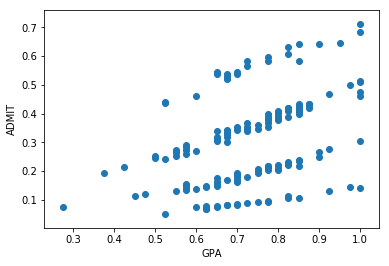

**************** Testing Data Plot using GPA **********************


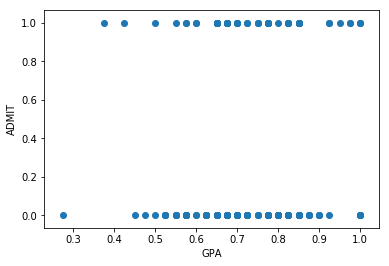

In [110]:
print("**************** Prediction using GPA **********************")
m.scatter(x_test[:,1],new_Y)
m.xlabel("GPA")
m.ylabel("ADMIT")
m.show()

print("**************** Testing Data Plot using GPA **********************")
m.scatter(x_test[:,1],y_test)
m.xlabel("GPA")
m.ylabel("ADMIT")
m.show()

**************** Prediction using GRE **********************


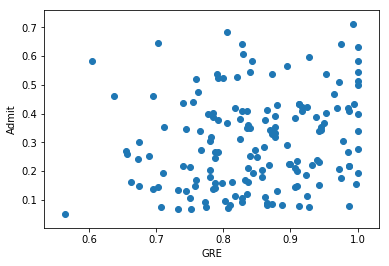

**************** Testing Data Plot GRE **********************


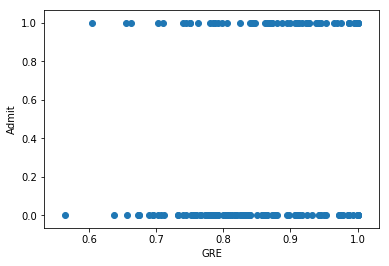

In [111]:
print("**************** Prediction using GRE **********************")
m.scatter(x_test[:,2],new_Y)
m.xlabel("GRE")
m.ylabel("Admit")
m.show()

print("**************** Testing Data Plot GRE **********************")
m.scatter(x_test[:,2],y_test)
m.xlabel("GRE")
m.ylabel("Admit")
m.show()

**************** Prediction using RANK **********************


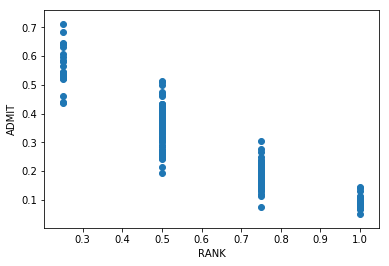

**************** Testing Data Plot using RANK **********************


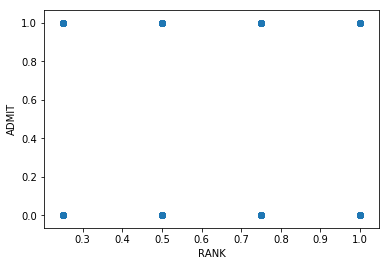

In [112]:
print("**************** Prediction using RANK **********************")
m.scatter(x_test[:,3],new_Y)
m.xlabel("RANK")
m.ylabel("ADMIT")
m.show()
print("**************** Testing Data Plot using RANK **********************")
m.scatter(x_test[:,3],y_test)
m.xlabel("RANK")
m.ylabel("ADMIT")
m.show()


In [113]:
num_matches = n.sum( new_Y == y_test)
accuracy = num_matches/len(y_test)
print(new_Y)
print(y_test)
print(num_matches)
print (accuracy)

[0.25283593 0.53746961 0.21690405 0.36767946 0.51883336 0.30636508
 0.40921538 0.26577521 0.2364849  0.22084298 0.10600886 0.09516762
 0.33787996 0.08292599 0.13116968 0.21028471 0.31264241 0.21817096
 0.32010636 0.40288163 0.40010966 0.26513432 0.15976027 0.21817096
 0.17605156 0.11945288 0.08298729 0.20116096 0.41399146 0.1450191
 0.40842869 0.1700527  0.42238813 0.60632555 0.30632097 0.34674498
 0.15187767 0.56650749 0.10608525 0.3889259  0.42058876 0.11295796
 0.10820917 0.07385382 0.27288991 0.09216959 0.68518816 0.11223817
 0.14231329 0.05089536 0.37651036 0.46288531 0.42359144 0.71114957
 0.45998279 0.16108835 0.53664451 0.27272374 0.33110865 0.24824627
 0.38289313 0.22611605 0.24546377 0.43486428 0.07617804 0.08992692
 0.5241645  0.35479478 0.31778255 0.12993542 0.19413003 0.40981532
 0.23104221 0.08027939 0.08180808 0.19268512 0.21368422 0.14565729
 0.07363149 0.52867122 0.13901634 0.28966053 0.06942948 0.2410742
 0.14924439 0.64082845 0.408024   0.34192882 0.34842561 0.068584